In [128]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset,Dataset,DatasetDict
import matplotlib.pyplot as plt
import random
from collections import Counter, defaultdict
import numpy as np
import pickle

In [2]:
%matplotlib inline

In [3]:
load_dotenv()
os.environ['HF_TOKEN'] = os.getenv("HUGGINGFACE_API_KEY")
os.environ['OPENAI_API'] = os.getenv('OPENAI_API')

In [4]:
hf_token = os.environ['HF_TOKEN']
login(hf_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [5]:
from loaders import ItemLoader
from items import Item

In [6]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023",f"raw_meta_Appliances",split="full",trust_remote_code=True)

In [7]:
len(dataset)

94327

In [8]:
datapoint = dataset[11]

In [9]:
# datapoint

In [10]:
print(datapoint['main_category'])
print(datapoint['title'])
print(datapoint['average_rating'])
print(datapoint['rating_number'])
print(datapoint['description'])
print(datapoint['features'])
print(datapoint['details'])
print(datapoint['price'])

Tools & Home Improvement
Agitator Cam Kit W/ Dogs for Whirlpool Sears Kenmore 285748 3347085
4.1
34
['Appliance Replacement Part ER285748']
['Agitaor Cam Kit', '285748']
{"Manufacturer": "Standard Generic Replacement", "Part Number": "285748", "Item Weight": "3.04 ounces", "Package Dimensions": "7 x 7 x 7 inches", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Number Of Pieces": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Date First Available": "April 12, 2015"}
None


In [11]:
prices = 0
for datapoint in dataset:
    if datapoint['price'] != 'None':
        if float(datapoint['price']) > 0:
            prices += 1
print(f'There are {prices:,} with prices which is about {prices/len(dataset)*100:.1f}%')

There are 46,726 with prices which is about 49.5%


In [12]:
prices = []
lengths = []
for datapoint in dataset:
    try:
        price = float(datapoint['price'])
        if price > 0:
            prices.append(price)
            contents = datapoint['title'] + str(datapoint['description']) + str(datapoint['features']) + str(datapoint['details'])
            lengths.append(len(contents))
    except ValueError as e:
        pass

In [13]:
print((prices))
print(lengths)

[25.07, 8.99, 53.68, 16.52, 6.29, 8.89, 38.99, 79.95, 54.27, 34.99, 7.49, 99.84, 7.95, 138.0, 36.95, 17.68, 64.5, 22.68, 29.99, 113.5, 36.95, 31.94, 6.95, 13.04, 28.99, 8.99, 7.99, 139.99, 206.0, 37.43, 29.99, 24.39, 19.99, 134.99, 23.37, 15.53, 102.4, 24.99, 71.68, 13.49, 14.99, 69.43, 9.95, 30.99, 69.93, 42.89, 22.99, 16.88, 4.99, 22.42, 9.59, 17.15, 10.57, 10.5, 24.98, 7.99, 72.23, 11.59, 39.95, 22.99, 6.99, 65.99, 21.99, 19.99, 9.59, 54.95, 22.99, 12.99, 76.99, 16.99, 28.95, 16.99, 58.71, 159.99, 18.83, 9.99, 11.99, 38.86, 7.53, 13.95, 399.99, 47.99, 85.02, 65.02, 89.99, 25.0, 18.55, 36.25, 22.98, 12.97, 12.99, 77.54, 134.44, 19.99, 26.96, 39.0, 45.09, 59.99, 34.99, 27.99, 9.5, 149.99, 12.99, 15.99, 21.99, 31.99, 39.99, 80.95, 26.95, 45.0, 17.59, 17.63, 202.02, 11.91, 9.7, 25.99, 32.2, 59.99, 18.99, 5.99, 12.99, 249.99, 7.99, 25.99, 28.5, 49.99, 56.38, 19.0, 25.39, 18.77, 21.24, 109.5, 15.86, 26.17, 18.99, 41.33, 10.99, 7.77, 21.99, 39.97, 17.91, 118.35, 22.97, 59.99, 71.2, 68.95, 

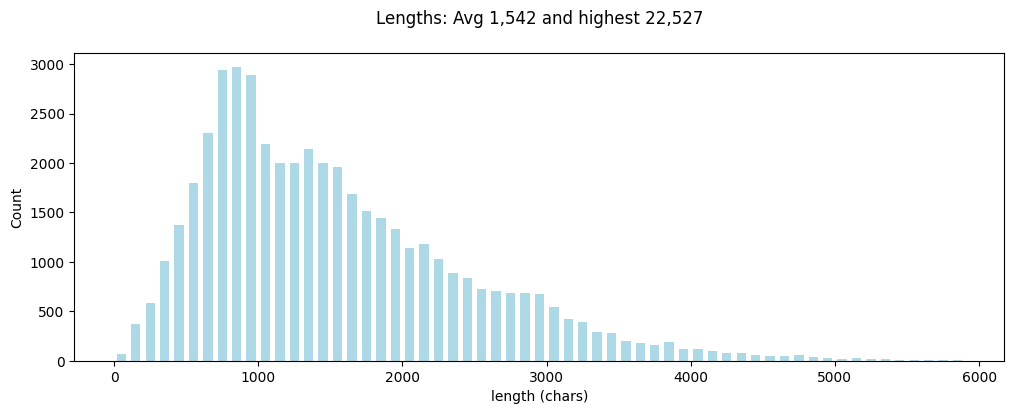

In [14]:
plt.figure(figsize=(12,4))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel("length (chars)")
plt.ylabel("Count")
plt.hist(lengths,rwidth=0.65,color="lightblue",bins=range(0,6000,100))
plt.show()

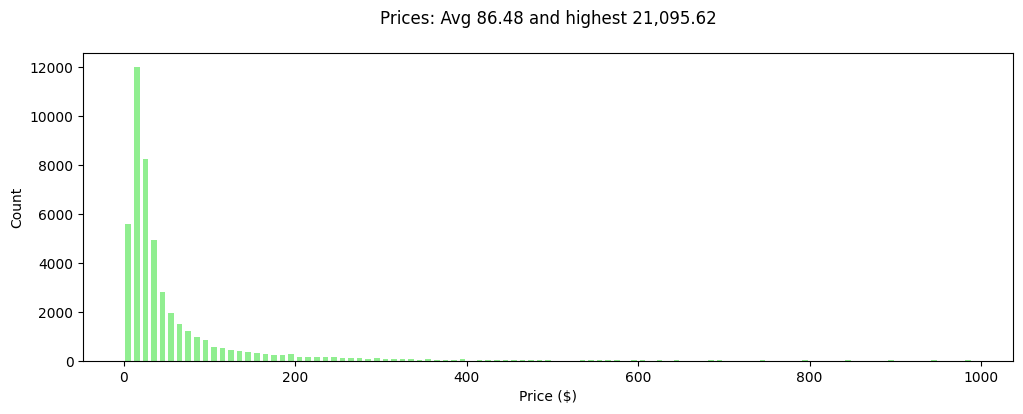

In [15]:
plt.figure(figsize=(12,4))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.hist(prices,rwidth=0.65,color="lightgreen",bins=range(0,1000,10))
plt.show()

In [16]:
# Create an Item object for each with a price

items = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            item = Item(datapoint, price)
            if item.include:
                items.append(item)
    except ValueError as e:
        pass

print(f"There are {len(items):,} items")

There are 29,191 items


In [17]:
# print(items[0].prompt)

In [18]:
# print(items[0].test_prompt())

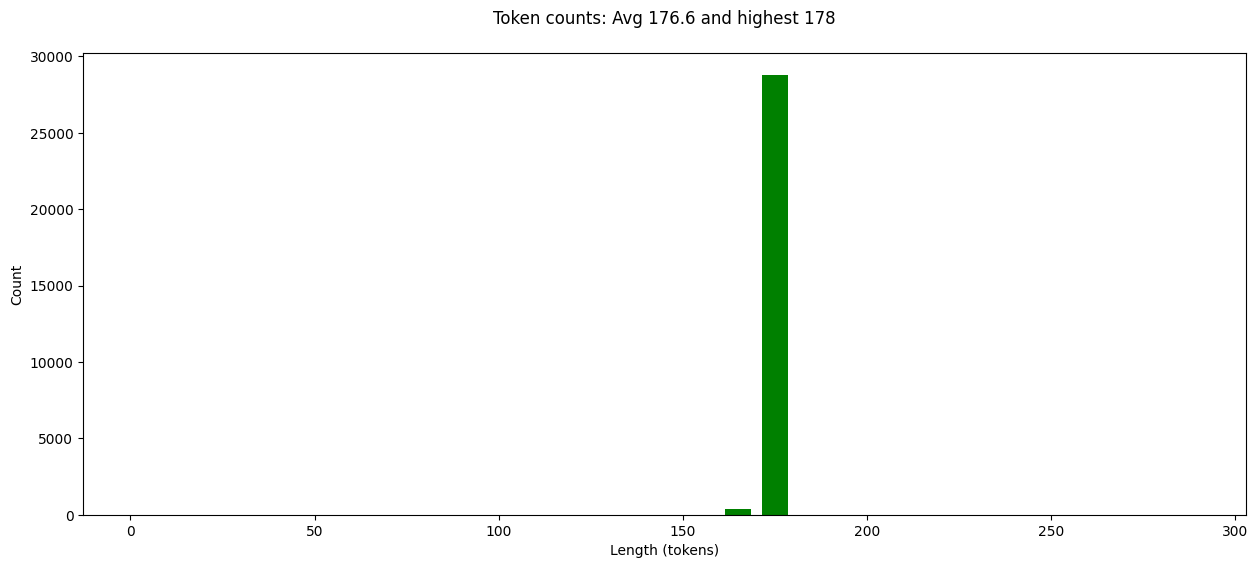

In [19]:
# Plot the distribution of token counts

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

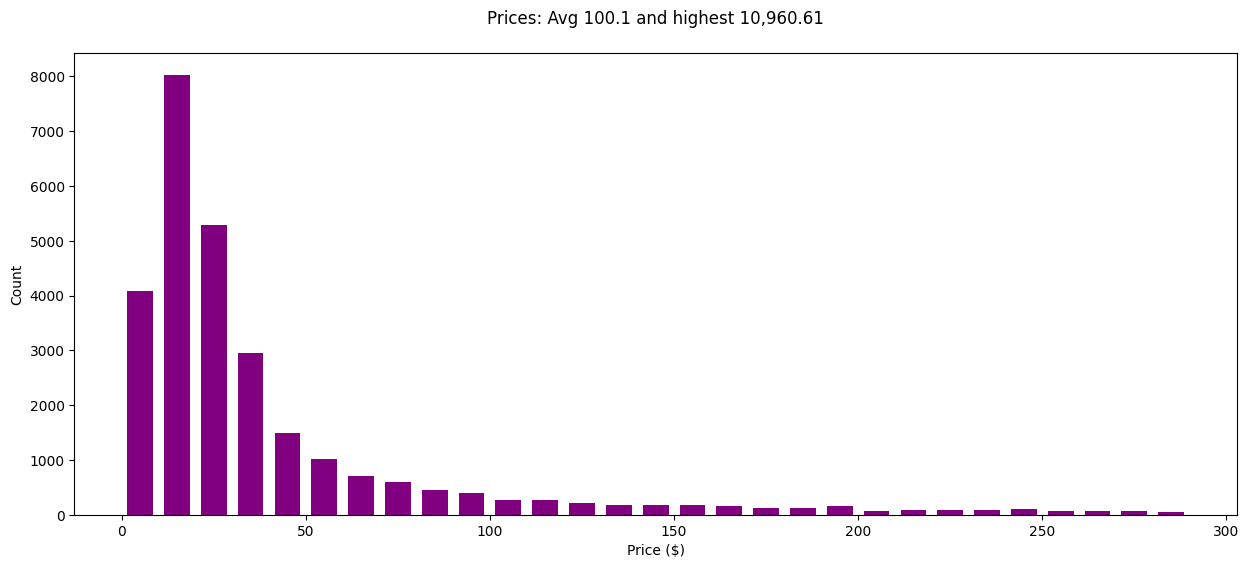

In [20]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 300, 10))
plt.show()

In [21]:
# items = ItemLoader("Appliances").load()

In [22]:
print(items[1].prompt)

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally

Price is $17.00


In [ ]:
dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]

In [24]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Automotive
Attempting to load raw_meta_Automotive with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Automotive.jsonl:   0%|          | 0.00/5.35G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/2003129 [00:00<?, ? examples/s]

✓ Successfully loaded raw_meta_Automotive


100%|██████████| 2004/2004 [12:42<00:00,  2.63it/s]


Completed Automotive with 911,688 datapoints in 75.1 mins
Loading dataset Electronics
Attempting to load raw_meta_Electronics with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Electronics.jsonl:   0%|          | 0.00/5.25G [00:00<?, ?B/s]

d:\MASTERING_LLMs\llmEnv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ANAND REDDY\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

✓ Successfully loaded raw_meta_Electronics


100%|██████████| 1611/1611 [07:07<00:00,  3.77it/s]


Completed Electronics with 443,473 datapoints in 59.9 mins
Loading dataset Office_Products
Attempting to load raw_meta_Office_Products with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Office_Products.jsonl:   0%|          | 0.00/2.15G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

✓ Successfully loaded raw_meta_Office_Products


100%|██████████| 711/711 [02:09<00:00,  5.49it/s]


Completed Office_Products with 240,394 datapoints in 20.0 mins
Loading dataset Tools_and_Home_Improvement
Attempting to load raw_meta_Tools_and_Home_Improvement with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Tools_and_Home_Improvement.jsonl:   0%|          | 0.00/4.85G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

✓ Successfully loaded raw_meta_Tools_and_Home_Improvement


100%|██████████| 1474/1474 [06:57<00:00,  3.53it/s]


Completed Tools_and_Home_Improvement with 541,051 datapoints in 46.9 mins
Loading dataset Cell_Phones_and_Accessories
Attempting to load raw_meta_Cell_Phones_and_Accessories with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Cell_Phones_and_Accessories.jsonl:   0%|          | 0.00/4.02G [00:00<?, ?B/s]

Force redownload failed: ('Connection broken: IncompleteRead(1676386809 bytes read, 2338773031 more expected)', IncompleteRead(1676386809 bytes read, 2338773031 more expected))
Clearing cache and retrying...
Clearing cache at C:\Users\ANAND REDDY/.cache/huggingface/datasets\McAuley-Lab___amazon-reviews-2023


meta_Cell_Phones_and_Accessories.jsonl:  29%|##9       | 1.67G/5.68G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1288490 [00:00<?, ? examples/s]

✓ Successfully loaded raw_meta_Cell_Phones_and_Accessories after cache clear


100%|██████████| 1289/1289 [03:55<00:00,  5.46it/s]


Completed Cell_Phones_and_Accessories with 238,869 datapoints in 37.6 mins
Loading dataset Toys_and_Games
Attempting to load raw_meta_Toys_and_Games with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Toys_and_Games.jsonl:   0%|          | 0.00/2.64G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/890874 [00:00<?, ? examples/s]

✓ Successfully loaded raw_meta_Toys_and_Games


100%|██████████| 891/891 [03:03<00:00,  4.85it/s]


Completed Toys_and_Games with 340,479 datapoints in 25.0 mins
Loading dataset Appliances
Attempting to load raw_meta_Appliances with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

✓ Successfully loaded raw_meta_Appliances


100%|██████████| 95/95 [00:20<00:00,  4.60it/s]


Completed Appliances with 28,625 datapoints in 2.8 mins
Loading dataset Musical_Instruments
Attempting to load raw_meta_Musical_Instruments with force redownload...


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

meta_Musical_Instruments.jsonl:   0%|          | 0.00/632M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/213593 [00:00<?, ? examples/s]

✓ Successfully loaded raw_meta_Musical_Instruments


100%|██████████| 214/214 [00:38<00:00,  5.61it/s]


Completed Musical_Instruments with 66,829 datapoints in 6.0 mins


In [25]:
len(items)

2811408

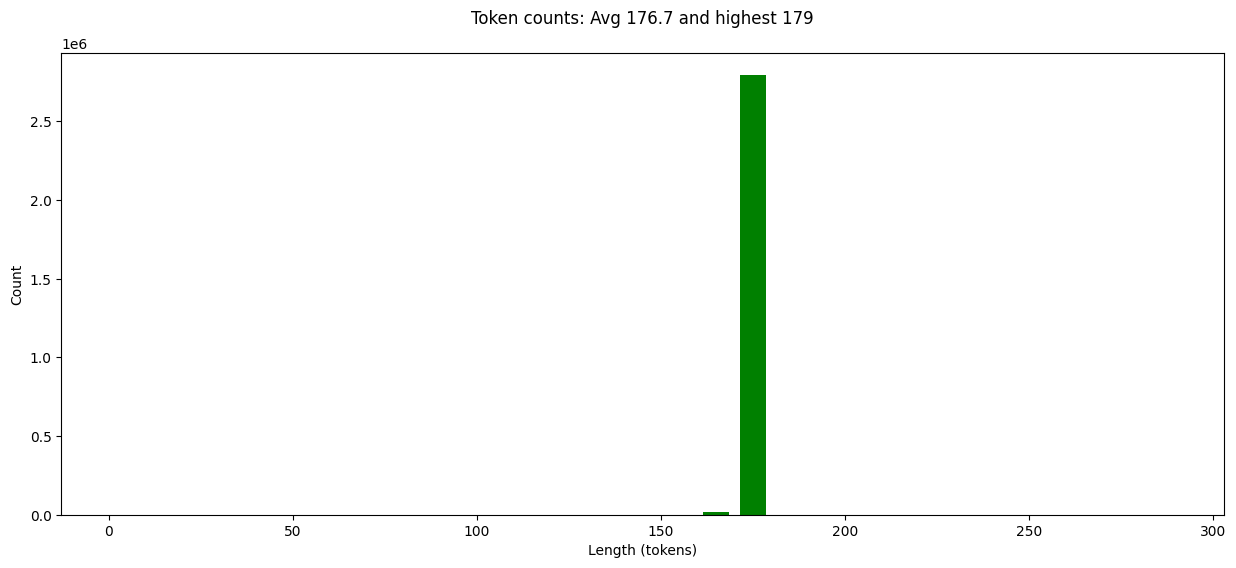

In [26]:
# Plot the distribution of token counts

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

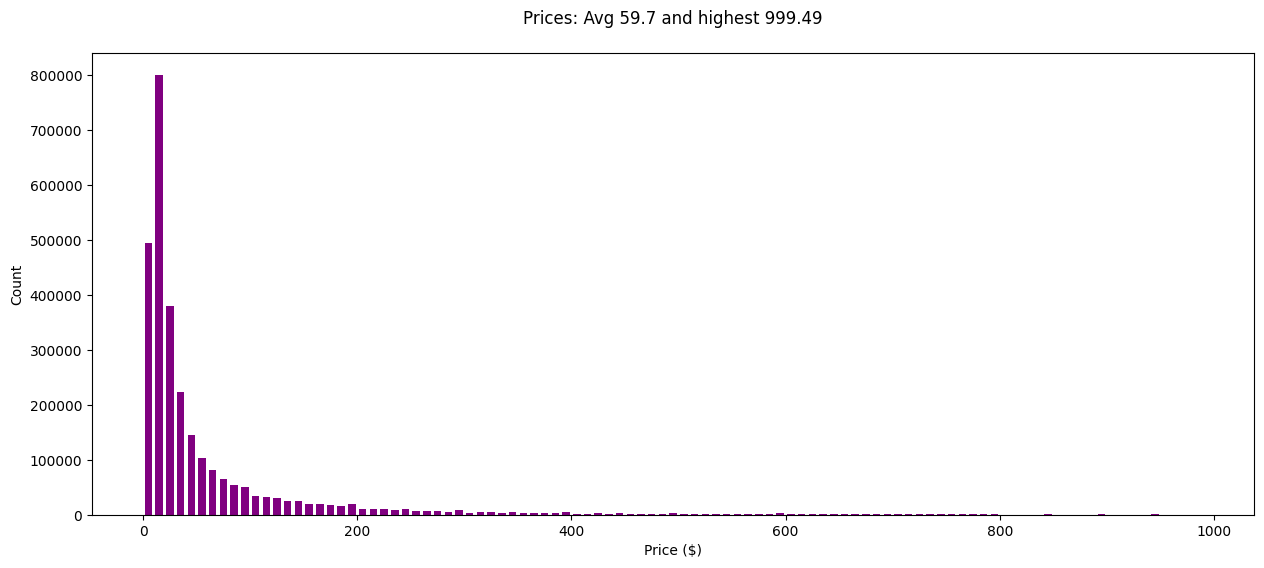

In [28]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 1000, 10))
plt.show()

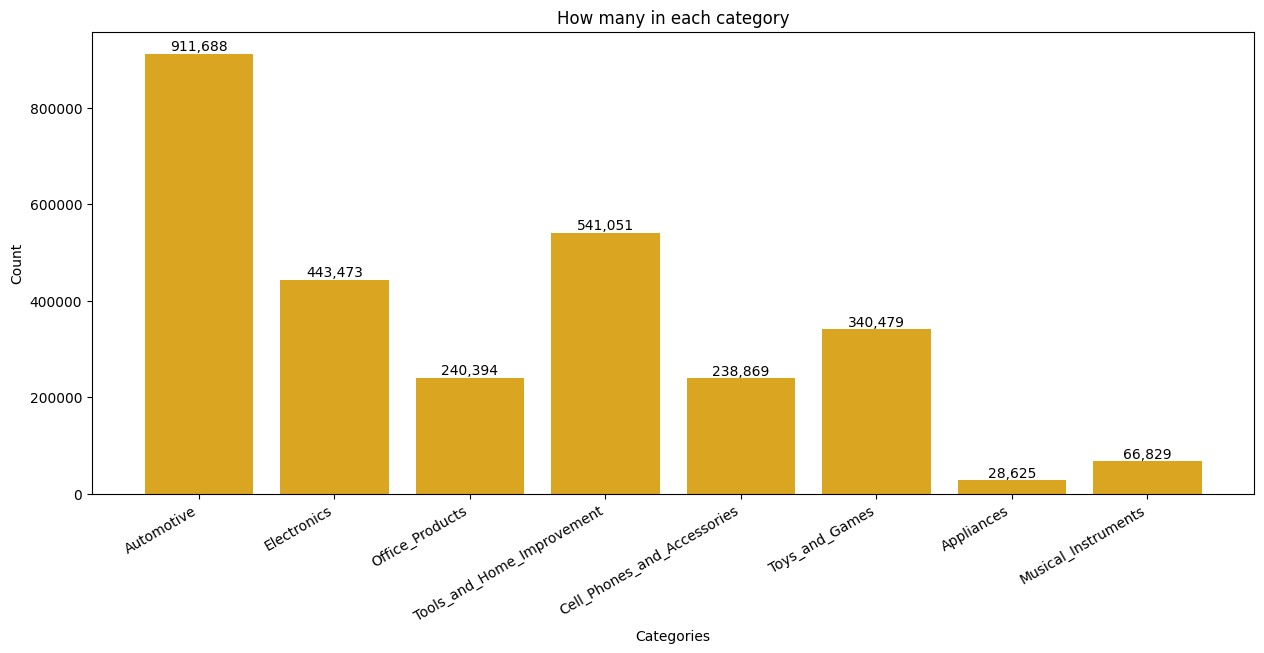

In [29]:
category_counts = Counter()
for item in items:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Bar chart by category
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

In [36]:
slots = defaultdict(list)
for item in items:
    slots[round(item.price)].append(item)

In [ ]:
slots[999][0]

<Bilstein 46-228871 Suspension Kit = $999.0>

In [72]:
for i in range(1,2):
    print(slots[i][0])

<AGS Steel Brake Line Union, 3/16 (3/8-24 Bubble), 1/card = $0.63>


In [ ]:
# Create a dataset called "sample" which tries to more evenly take from the range of prices
# And gives more weight to items from categories other than Automotive

np.random.seed(42)
random.seed(42)
sample = []
for i in range(1, 1000): # Price Range
    slot = slots[i]
    if i>=240:
        sample.extend(slot)
    elif len(slot) <= 1200:
        sample.extend(slot)
    else:
        weights = np.array([1 if item.category=='Automotive' else 5 for item in slot])
        weights = weights / np.sum(weights)
        selected_indices = np.random.choice(len(slot), size=1200, replace=False, p=weights)
        selected = [slot[i] for i in selected_indices]
        sample.extend(selected)

print(f"There are {len(sample):,} items in the sample")

There are 408,635 items in the sample


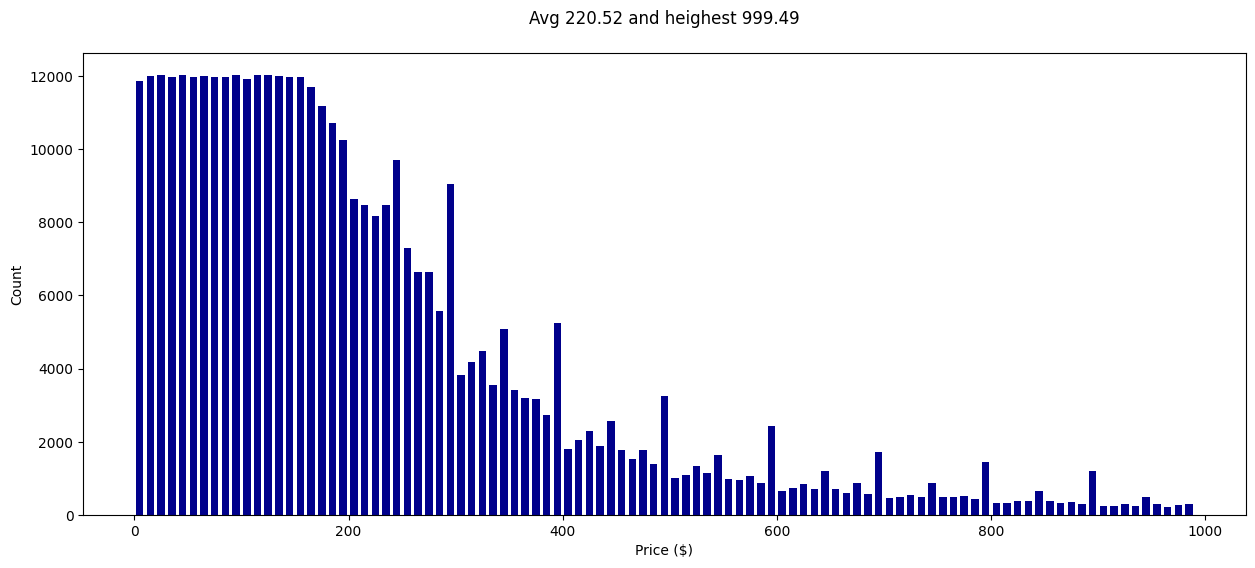

In [47]:
prices = [float(item.price) for item in sample]
plt.figure(figsize=(15,6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and heighest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices,rwidth=0.7,color='darkblue',bins=range(0,1000,10))
plt.show()

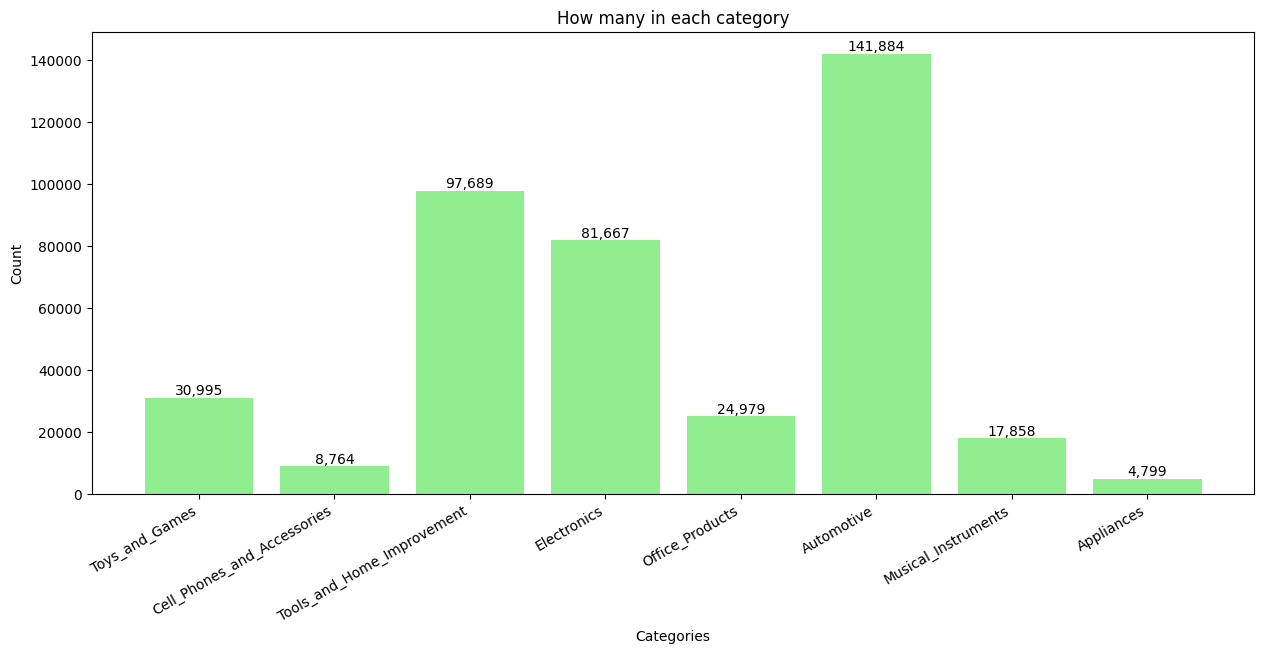

In [48]:
category_counts = Counter()
for item in sample:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Create bar chart
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="lightgreen")

# Customize the chart
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

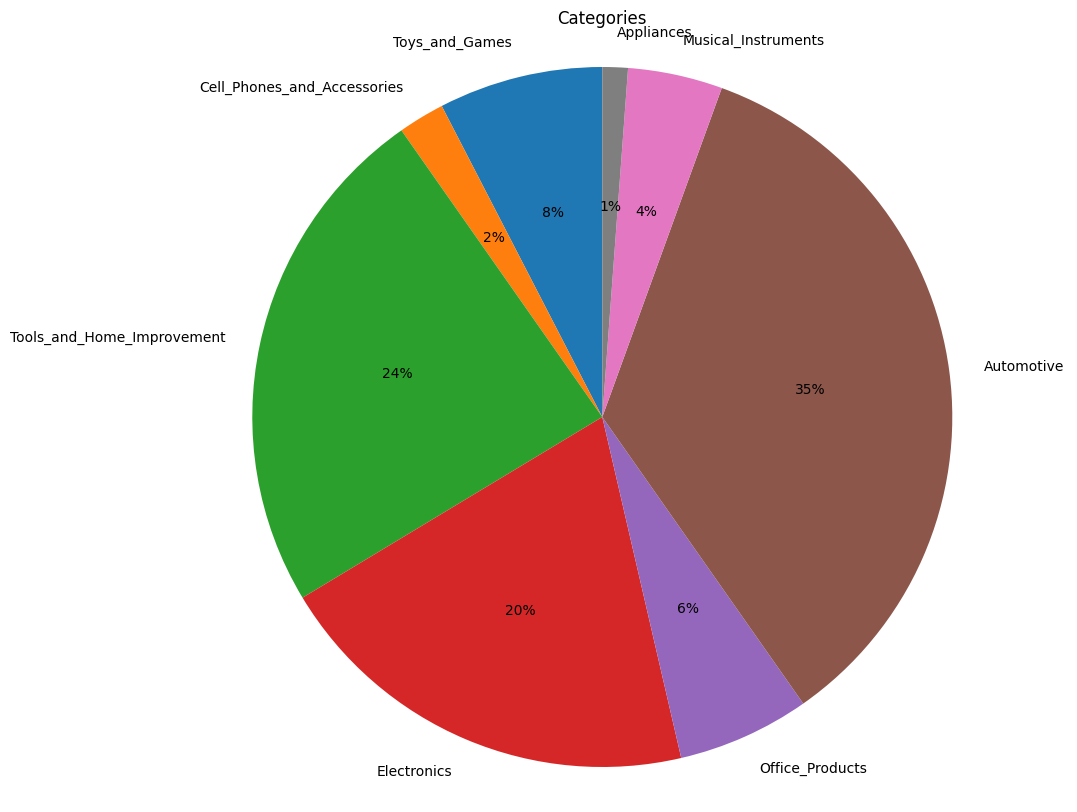

In [76]:
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

plt.title('Categories')
plt.axis('equal')  

plt.show()

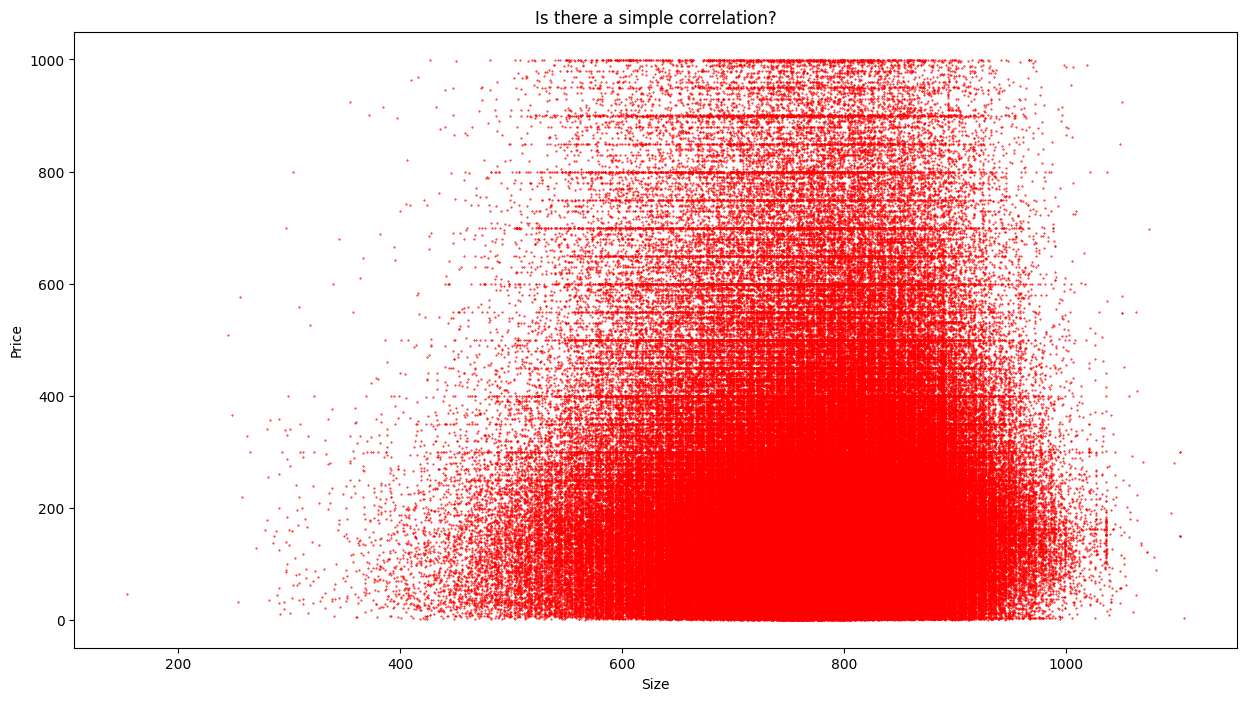

In [77]:
# How does the price vary with the character count of the prompt?

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

In [98]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[:5])
    print(Item.tokenizer.batch_decode(tokens[:5]))

In [109]:
# report(sample[400000])

In [113]:
random.seed(42)
random.shuffle(sample)
train = sample[:400_000]
test = sample[400_000:402_000]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,.2f}\n")

Divided into a training set of 400,000 items and test set of 2,000.00



In [114]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Perfect Pod EZ-Cup Paper Coffee Filters with Patented Lid for Single-Serve Coffee Brewers and Coffee Pods, Compatible with Keurig, (500 Filters)
✅ For use with Perfect Pod's EZ-Cup 2.0 solution and any other reusable, refillable single-serve Coffee Pods (compatible with Keurig, Mr Coffee, Breville, Cuisinart, and Mueller Ultima) ✅ Saves up to 80% over pre-filled, reusable and refillable Coffee Pod or tea pod capsules ✅ 100% Biodegradable, recyclable, and disposable paper coffee filter (keeps wasteful plastic out of landfills) ✅ Designed to trap coffee's natural oils, sendiment, and grounds for a smooth, satisfying cup of coffee ✅ Use

Price is $47.00


In [116]:
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

Double-Sided Mobile Book Display with Storage, Classroom Bookshelf, Natural
Promote early literacy and organization in a reading nook, bedroom, playroom, or classroom with the Double-Sided Book Display with Storage. Designed to grow with little ones, this tiered shelf helps parents, teachers, and educators provide exposure to various literature while staying organized. Instilling consistent reading routines in young children helps develop their interests and cultivate a passion for learning. The five forward-facing shelves provide ample space to display and store all your child’s favorite books, magazines, and other reading material. The tiered display keeps book covers visible allowing children to see their favorite stories. The low-profile organizer encourages little ones to choose their own stories independently and confidently clean up when story time ends. The organizer on the back provides

Price is $


In [118]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [119]:
train_dataset = Dataset.from_dict({"text":train_prompts,"price":train_prices})
test_dataset = Dataset.from_dict({"text":test_prompts,"price":test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [123]:
len(train_dataset)

400000

In [ ]:
DATASET_NAME = "AnandforU/price-data"
dataset.push_to_hub(DATASET_NAME,private=True,token="HF_TOKEN_WITH_WRITE_ACCESS")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/400 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/AnandforU/price-data/commit/34839bc5a00cb4d865145d952430adf603e6bf54', commit_message='Upload dataset', commit_description='', oid='34839bc5a00cb4d865145d952430adf603e6bf54', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/AnandforU/price-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='AnandforU/price-data'), pr_revision=None, pr_num=None)

In [129]:
with open('train.pkl','wb') as file:
    pickle.dump(train,file)
with open('test.pkl','wb') as file:
    pickle.dump(test,file)